In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

I will call the original test data x_test as x_predict because i will split the train data available to actually test the models i will be creating to predict the target values

In [2]:
x_predict0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MPA_MLF_Project/x_test.csv')
x_train0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MPA_MLF_Project/x_train.csv')
y_train0 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MPA_MLF_Project/y_train.csv')

In [3]:
y_train0['target'].unique()

array([5, 1, 6, 3, 2, 7, 8, 4])

In [4]:
print(x_train0.shape)
print(x_predict0.shape)
x_predict0.columns

(15360, 12)
(3840, 12)


Index(['Unnamed: 0', 'cfo_demod', 'gain_imb', 'iq_imb', 'or_off', 'quadr_err',
       'm_power', 'ph_err', 'mag_err', 'evm', 'Tosc', 'Tmix'],
      dtype='object')

In [5]:
x_predict = x_predict0.drop(['Unnamed: 0','Tosc','Tmix','m_power'], axis=1)
x_train = x_train0.drop(['Unnamed: 0','Tosc','Tmix','m_power'], axis=1)
Y_train = y_train0.drop(['Unnamed: 0'], axis=1)

In [6]:
x_train.head(30)

cfo_demod  gain_imb     iq_imb     or_off  quadr_err    ph_err  \
0    592.234802  0.048079 -35.082729 -28.560846   1.993170  1.107926   
1   -103.302032 -0.019917 -29.946953 -35.798664  -3.642311  1.236059   
2   -582.331299  0.036379 -32.096672 -31.905628   2.835839  1.282163   
3   -630.611267  0.063928 -38.216297 -30.084171   1.346316  1.154848   
4   -415.526978 -0.055761 -29.180740 -36.601025  -3.963526  1.498889   
5   -432.158600 -0.030759 -29.860676 -36.194633  -3.675441  1.537498   
6  -1121.172485  0.080203 -39.686409 -27.786304   1.063713  1.197557   
7    -60.408207  0.097589 -31.729502 -29.707535   2.926517  1.300429   
8   -162.684296  0.117599 -32.867283 -28.412897   2.533771  1.259792   
9   -460.115356  0.097939 -38.504665 -30.381096   1.198071  1.201420   
10  -974.192200  0.077201 -37.768188 -27.761707   1.391306  1.220774   
11  -424.394470  0.085833 -45.142429 -26.951569  -0.055014  1.008745   
12  -551.851562  0.022790 -48.593555 -27.231558   0.398663  1.067947   
13  -424.718903  0.081707 -46.425404 -27.150900   0.092605  1.161273   
14  -393.008636  0.097494 -42.585526 -27.207031   0.557159  1.018764   
15   604.022217  0.089960 -34.310669 -29.051741   2.124515  1.080267   
16  -478.981110  0.043398 -40.388252 -30.479301   1.057737  1.188234   
17  -306.119537 -0.002638 -30.364796 -35.768986  -3.473557  1.192519   
18   583.088745  0.085071 -34.348637 -28.975464   2.123309  1.102653   
19   212.909195  0.071422 -34.874214 -28.283262   2.012881  1.126992   
20   -21.653339 -0.040016 -29.470875 -37.196228  -3.840819  1.545983   
21 -1052.691406  0.065019 -40.903351 -28.028957   0.939438  1.075014   
22  -393.627258  0.021288 -31.935711 -31.578016   2.878572  1.252324   
23  -319.169098  0.110985 -33.016941 -28.146753   2.453114  1.231163   
24   562.139893  0.072311 -34.479889 -28.323956   2.131158  1.169358   
25  -555.968811  0.063468 -46.206257 -26.611082   0.373191  1.063310   
26 -1003.161743  0.084676 -38.713955 -27.406656   1.205644  1.164351   
27  -624.520874 -0.059420 -29.931486 -38.027901  -3.630095  1.502496   
28  -643.364807  0.110414 -34.884357 -29.512421   1.932187  1.333669   
29  -475.134338 -0.007396 -30.432201 -35.289268  -3.446418  1.154983   

     mag_err       evm  
0   1.507550  2.423943  
1   2.741568  3.458056  
2   2.140096  3.013522  
3   1.093465  2.254514  
4   3.608737  4.286684  
5   3.449937  4.194931  
6   0.900188  2.079625  
7   2.170298  3.130086  
8   1.939059  2.873458  
9   1.040533  2.311378  
10  1.050319  2.416128  
11  0.427296  1.751380  
12  0.520787  1.864710  
13  0.437285  2.034833  
14  0.627205  1.919874  
15  1.645444  2.437811  
16  0.943075  2.204659  
17  2.582235  3.280158  
18  1.599382  2.466668  
19  1.451577  2.423392  
20  3.536808  4.243072  
21  0.881416  2.043650  
22  2.141573  3.066289  
23  1.884157  2.845316  
24  1.538947  2.529043  
25  0.532694  1.731312  
26  1.012346  2.273823  
27  3.553265  4.204538  
28  1.496550  2.510443  
29  2.568323  3.240053

Checking for some missing values

In [7]:
print(x_train.isnull().sum())

cfo_demod    0
gain_imb     0
iq_imb       0
or_off       0
quadr_err    0
ph_err       0
mag_err      0
evm          0
dtype: int64


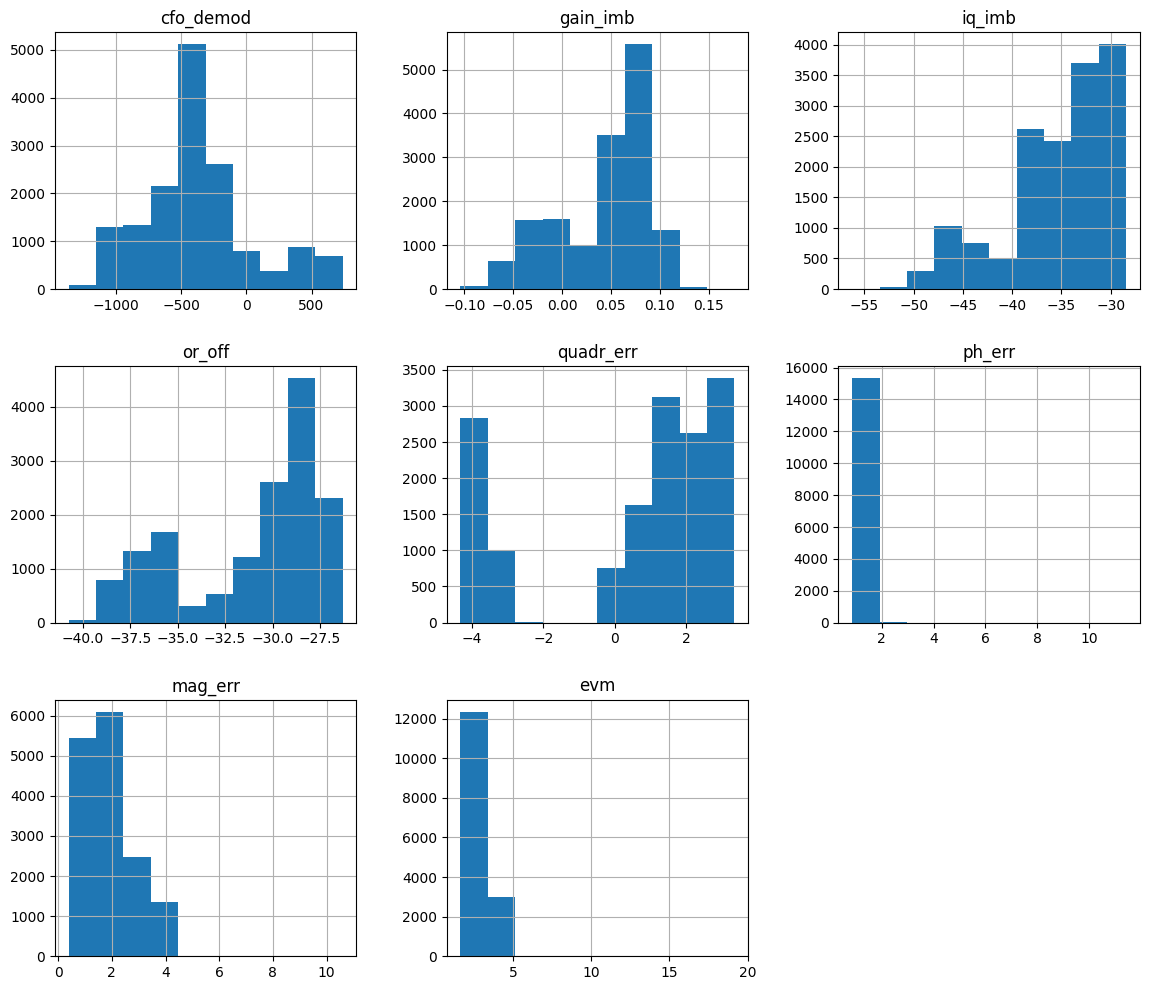

In [8]:
x_train.hist(figsize=(14,12))
plt.show()

Previously should i have transformed the data, like with a log transf or something like that, is it worht it?

In [9]:
# scaling the features can help to improve the performance of the model
# it is very useful when we're working with numerical features.

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()
x_train_scaled = pd.DataFrame(scaler.fit_transform(x_train), columns = x_train.columns)
x_predict_scaled =  pd.DataFrame(scaler.fit_transform(x_predict), columns = x_predict.columns)

X_train, X_test, y_train, y_test = train_test_split(x_train_scaled, Y_train, test_size=0.1, random_state=42)

In [10]:
y_train.shape

(13824, 1)

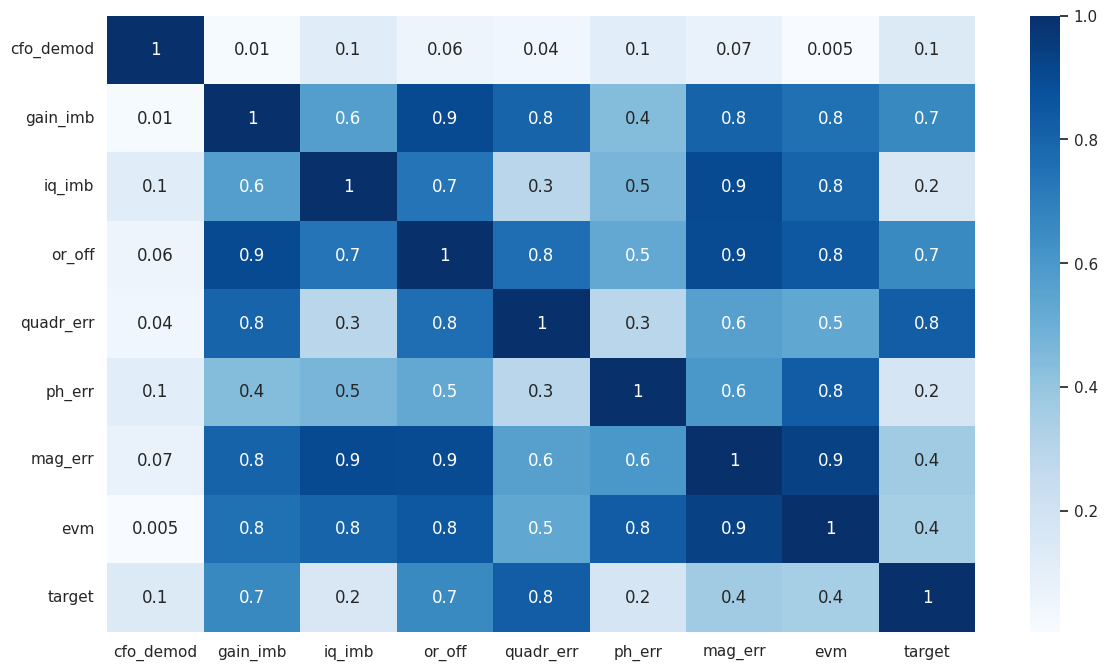

In [11]:
# We're interested in a single target variable and would like to see which features correlate with it.
# so i will put our target value with the dataframe of the features we have to check the corr. matrix

Data = pd.concat([X_train, y_train],axis=1)

plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = abs(Data.corr())         # I use the abs(), because right now we do not care about
                                # the nature of the correlation (neg. or pos.) we just want to check the correlation itself.

heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

From the correlation matrix, we can see that the target variable has moderate correlation with several features like gain_imb, or_off, quadr_err, and mag_err.

However, it has a weak correlation with cfo_demod and m_power

<Axes: >

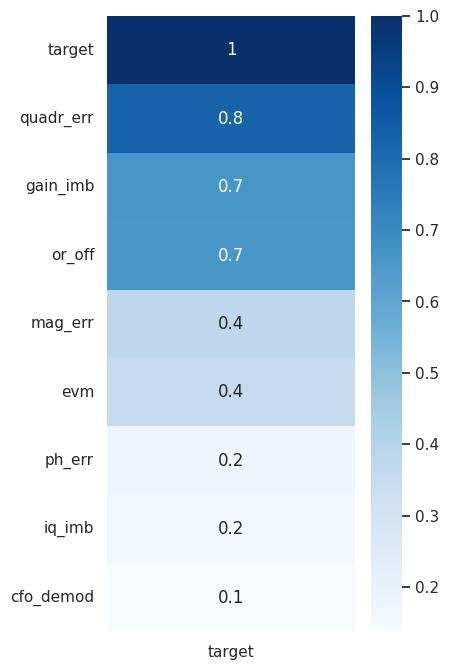

In [12]:
plt.figure(figsize=(4,8))
corr = abs(Data.corr()[['target']]).sort_values(by='target', ascending=False)
sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')

In [13]:
# Let's drop the features that are almost not correlated with our target value \
X_predict1 = x_predict_scaled.drop(['ph_err','iq_imb','cfo_demod'], axis=1)
X_train1 = X_train.drop(['ph_err','iq_imb','cfo_demod'], axis=1)
X_test1 = X_test.drop(['ph_err','iq_imb','cfo_demod'], axis=1)

In [14]:
Data1 = pd.concat([X_train1, y_train],axis=1)
cols = Data1.columns

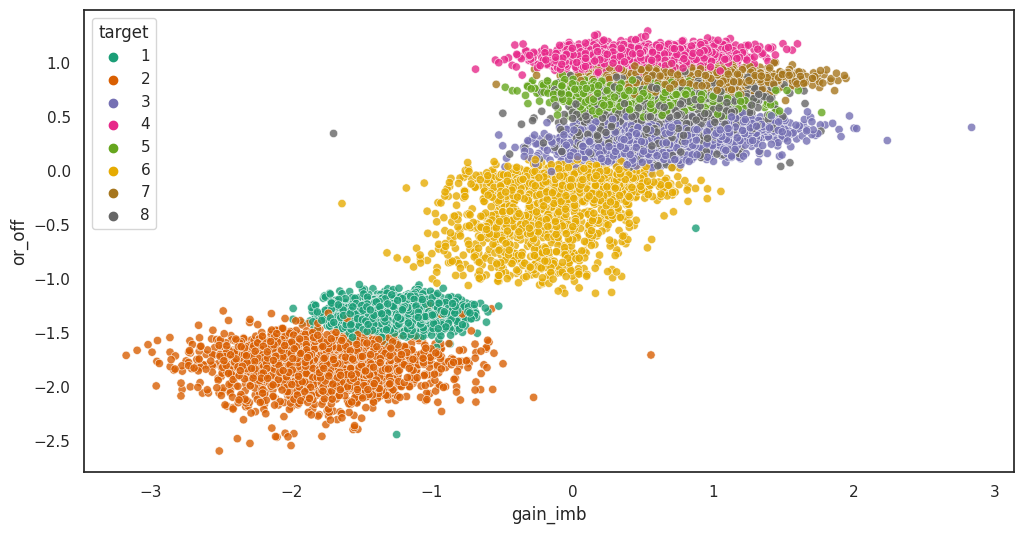

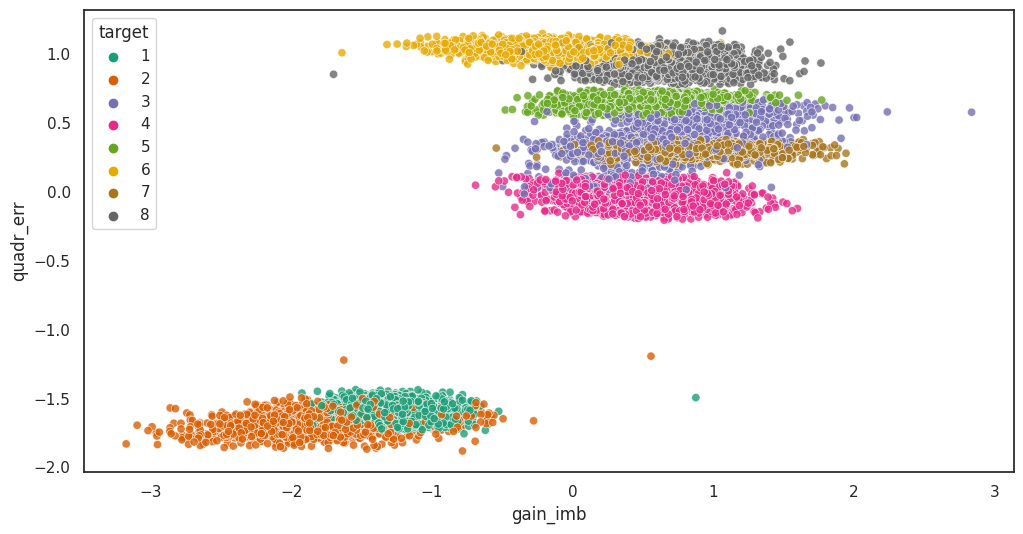

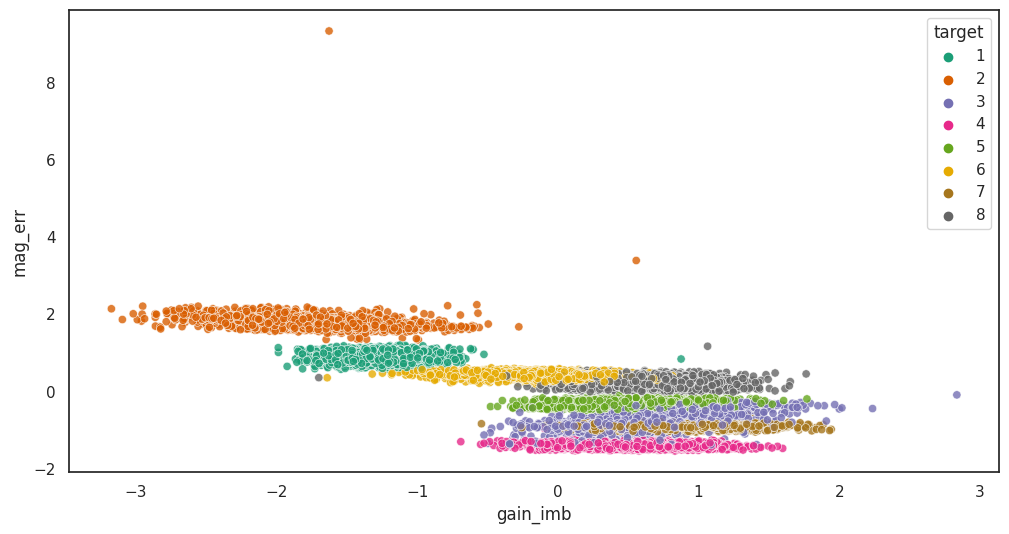

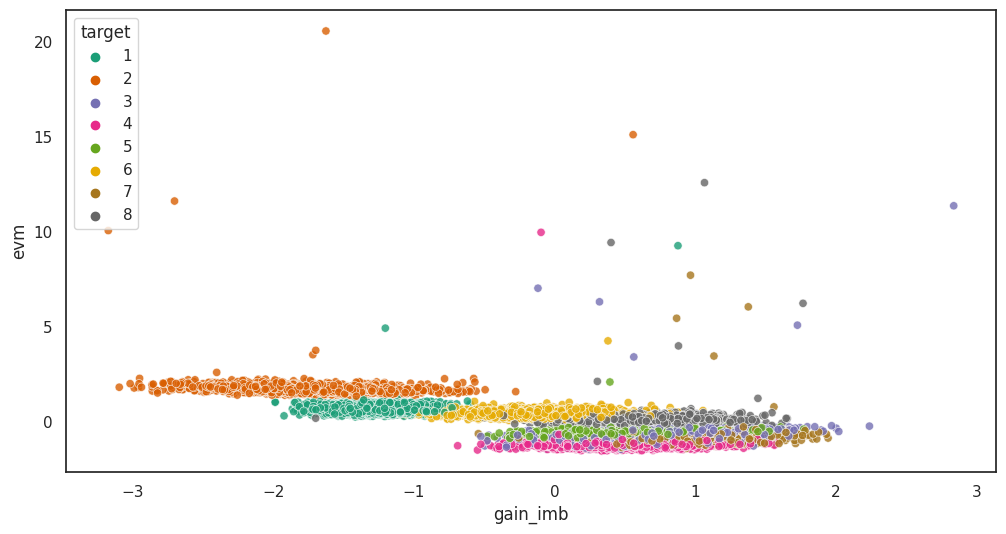

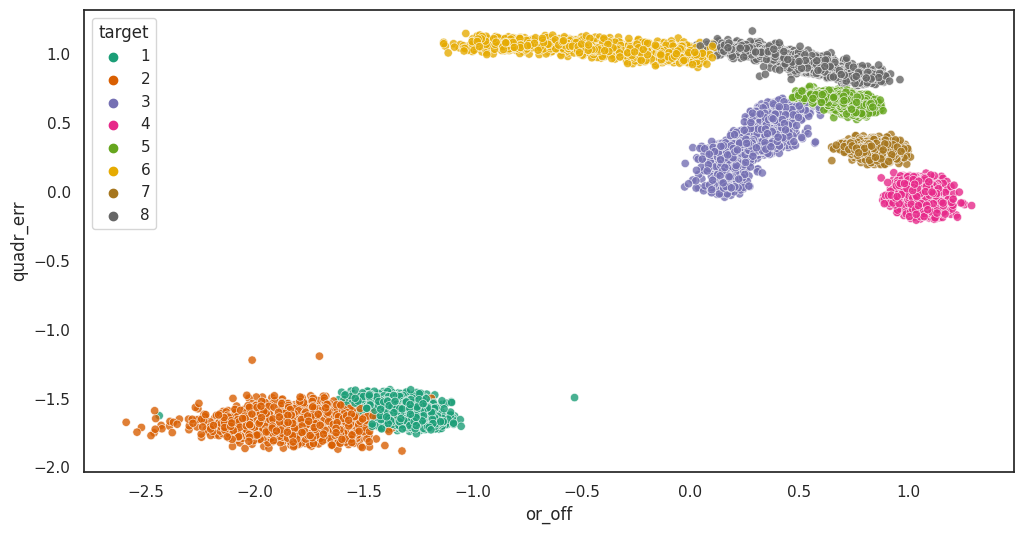

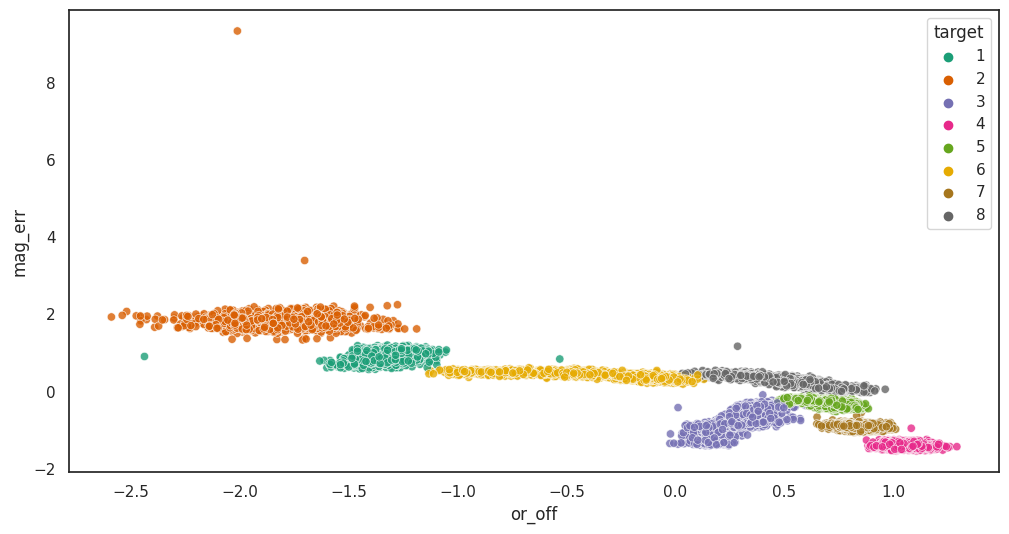

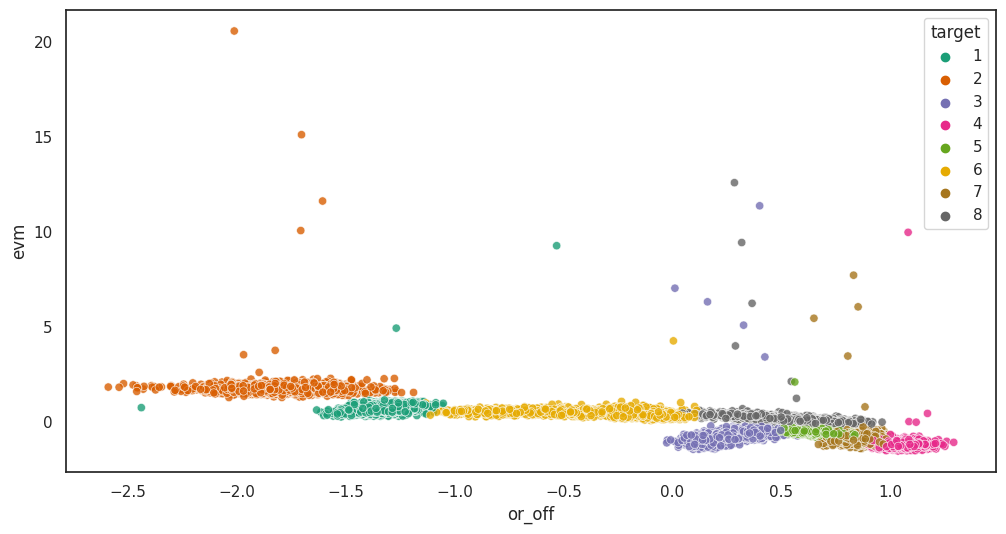

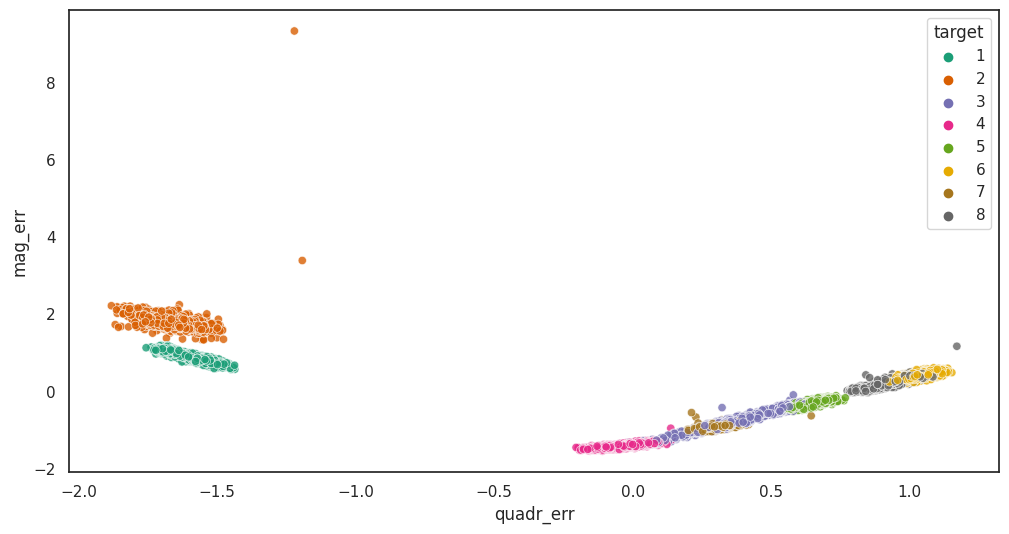

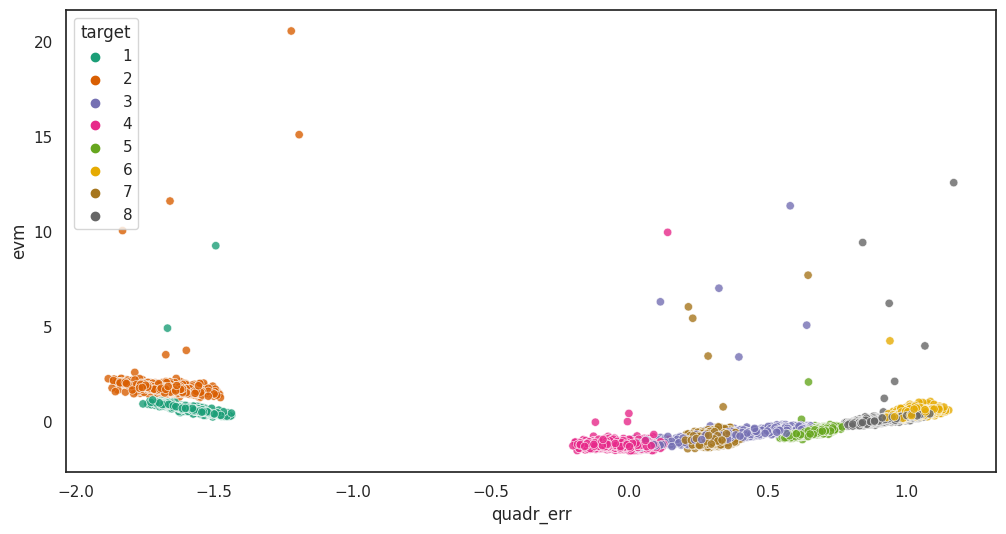

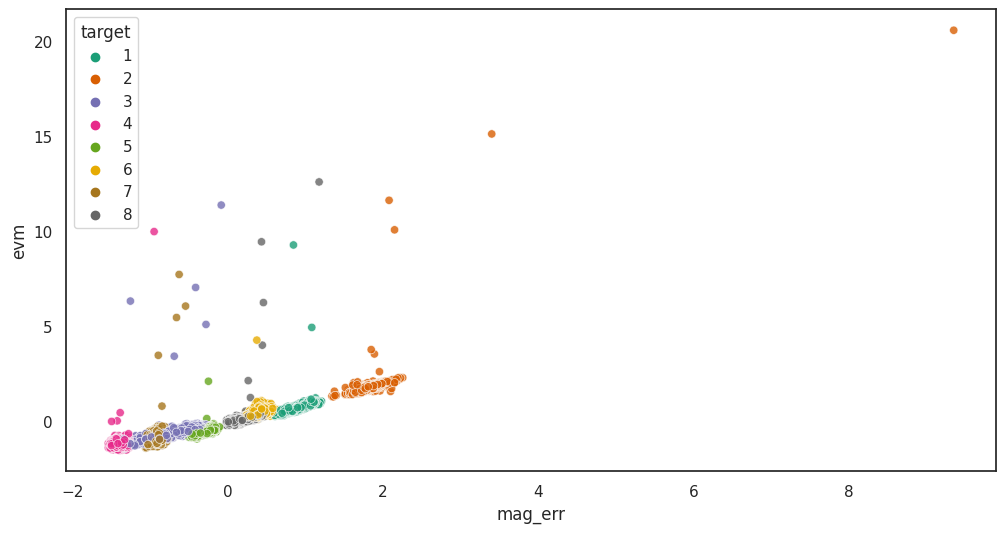

In [15]:
for i in range(len(Data1.columns)-1):
  for j in range(i+1, len(Data1.columns)-1):
    x_label = cols[i]
    y_label = cols[j]
    plt.rcParams["figure.figsize"] = (12, 6)
    sns.scatterplot(x = x_label, y = y_label, data = Data1, hue = 'target', palette = 'Dark2', alpha = 0.8)
    plt.show()

#Building and Training Model
 

We cannot be using the data to predict because it would be defeating our purpose for the model to predict successfully. It also could not be used to test how the model works because we do not have the target value of that data. 


Therefore we have to create a dataset for testing and in this case with NN also a validation set.

In [16]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2
from tensorflow.keras.utils import to_categorical

import time

In [17]:
num_classes = 8
y_train_onehot = to_categorical(y_train-1, num_classes)
y_test_onehot = to_categorical(y_test-1, num_classes)

128-nodes - 4-dense - time:1681046277
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               768       
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 dense_3 (Dense)             (None, 128)               16512     
                                                                 
 dense_4 (Dense)             (None, 128)               16512     
                                                                 
 dense_5 (Dense)             (None, 8)                 1032      
                                                                 
Total params: 67,8

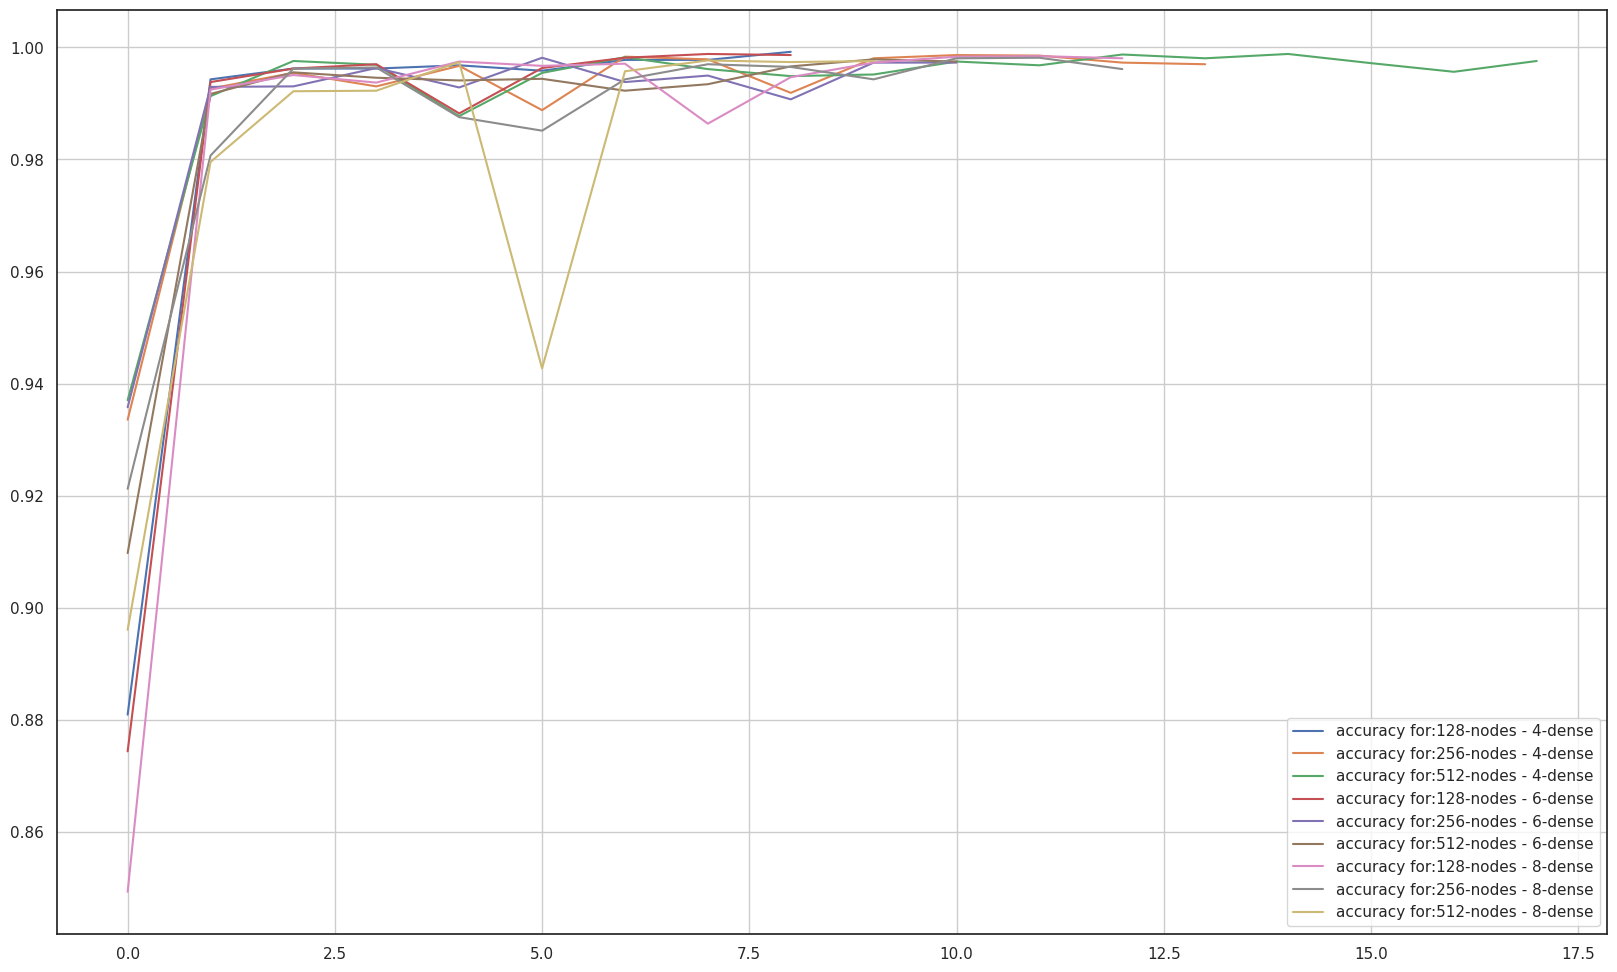

In [18]:
dense_layers = [4, 6, 8]
layer_sizes = [128, 256, 512]

Accuracy = []
Loss = []

plt.figure(figsize=(20,12))


for dense_layer in dense_layers:
    for layer_size in layer_sizes:
      NAME = "{}-nodes - {}-dense - time:{}".format( layer_size, dense_layer, int(time.time()))
      print(NAME)
      
      # Input layer
      model = Sequential()
      model.add(Dense(layer_size, input_shape=X_train1.shape[1:], activation='relu'))
      
      for l in range(dense_layer):
        # Hidden layers with dropout and L2 regularization
        model.add(Dense(layer_size, activation='relu'))


      # Output layer
      model.add(Dense(8, activation='softmax'))
      model.summary()

      optimizer = Adam(learning_rate = 0.001)
      model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

      # Define the training parameters
      epochs = 20
      batch_size = 64

      # Train the model
      early_stop = EarlyStopping(monitor='val_accuracy', patience=5)

      history = model.fit(X_train1, y_train_onehot , epochs=epochs, batch_size=batch_size, validation_split=0.1, callbacks = early_stop)

      score = model.evaluate(X_test1, y_test_onehot, verbose=0)
      Accuracy.append('Accuracy: {} % for:{}-nodes-{}-dense'.format(score[1]*100,layer_size, dense_layer))
      Loss.append('Loss: {}  for:{}-nodes-{}-dense'.format(score[0],layer_size, dense_layer))      

      plt.plot(history.history['accuracy'], label='accuracy for:{}-nodes - {}-dense'.format( layer_size, dense_layer))

plt.legend()
plt.grid(True)
plt.show()

In [19]:
Accuracy

['Accuracy: 99.79166388511658 % for:128-nodes-4-dense',
 'Accuracy: 99.66145753860474 % for:256-nodes-4-dense',
 'Accuracy: 99.81771111488342 % for:512-nodes-4-dense',
 'Accuracy: 99.73958134651184 % for:128-nodes-6-dense',
 'Accuracy: 99.6874988079071 % for:256-nodes-6-dense',
 'Accuracy: 99.76562261581421 % for:512-nodes-6-dense',
 'Accuracy: 99.71354007720947 % for:128-nodes-8-dense',
 'Accuracy: 99.71354007720947 % for:256-nodes-8-dense',
 'Accuracy: 99.81771111488342 % for:512-nodes-8-dense']

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               3072      
                                                                 
 dense_1 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_2 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0

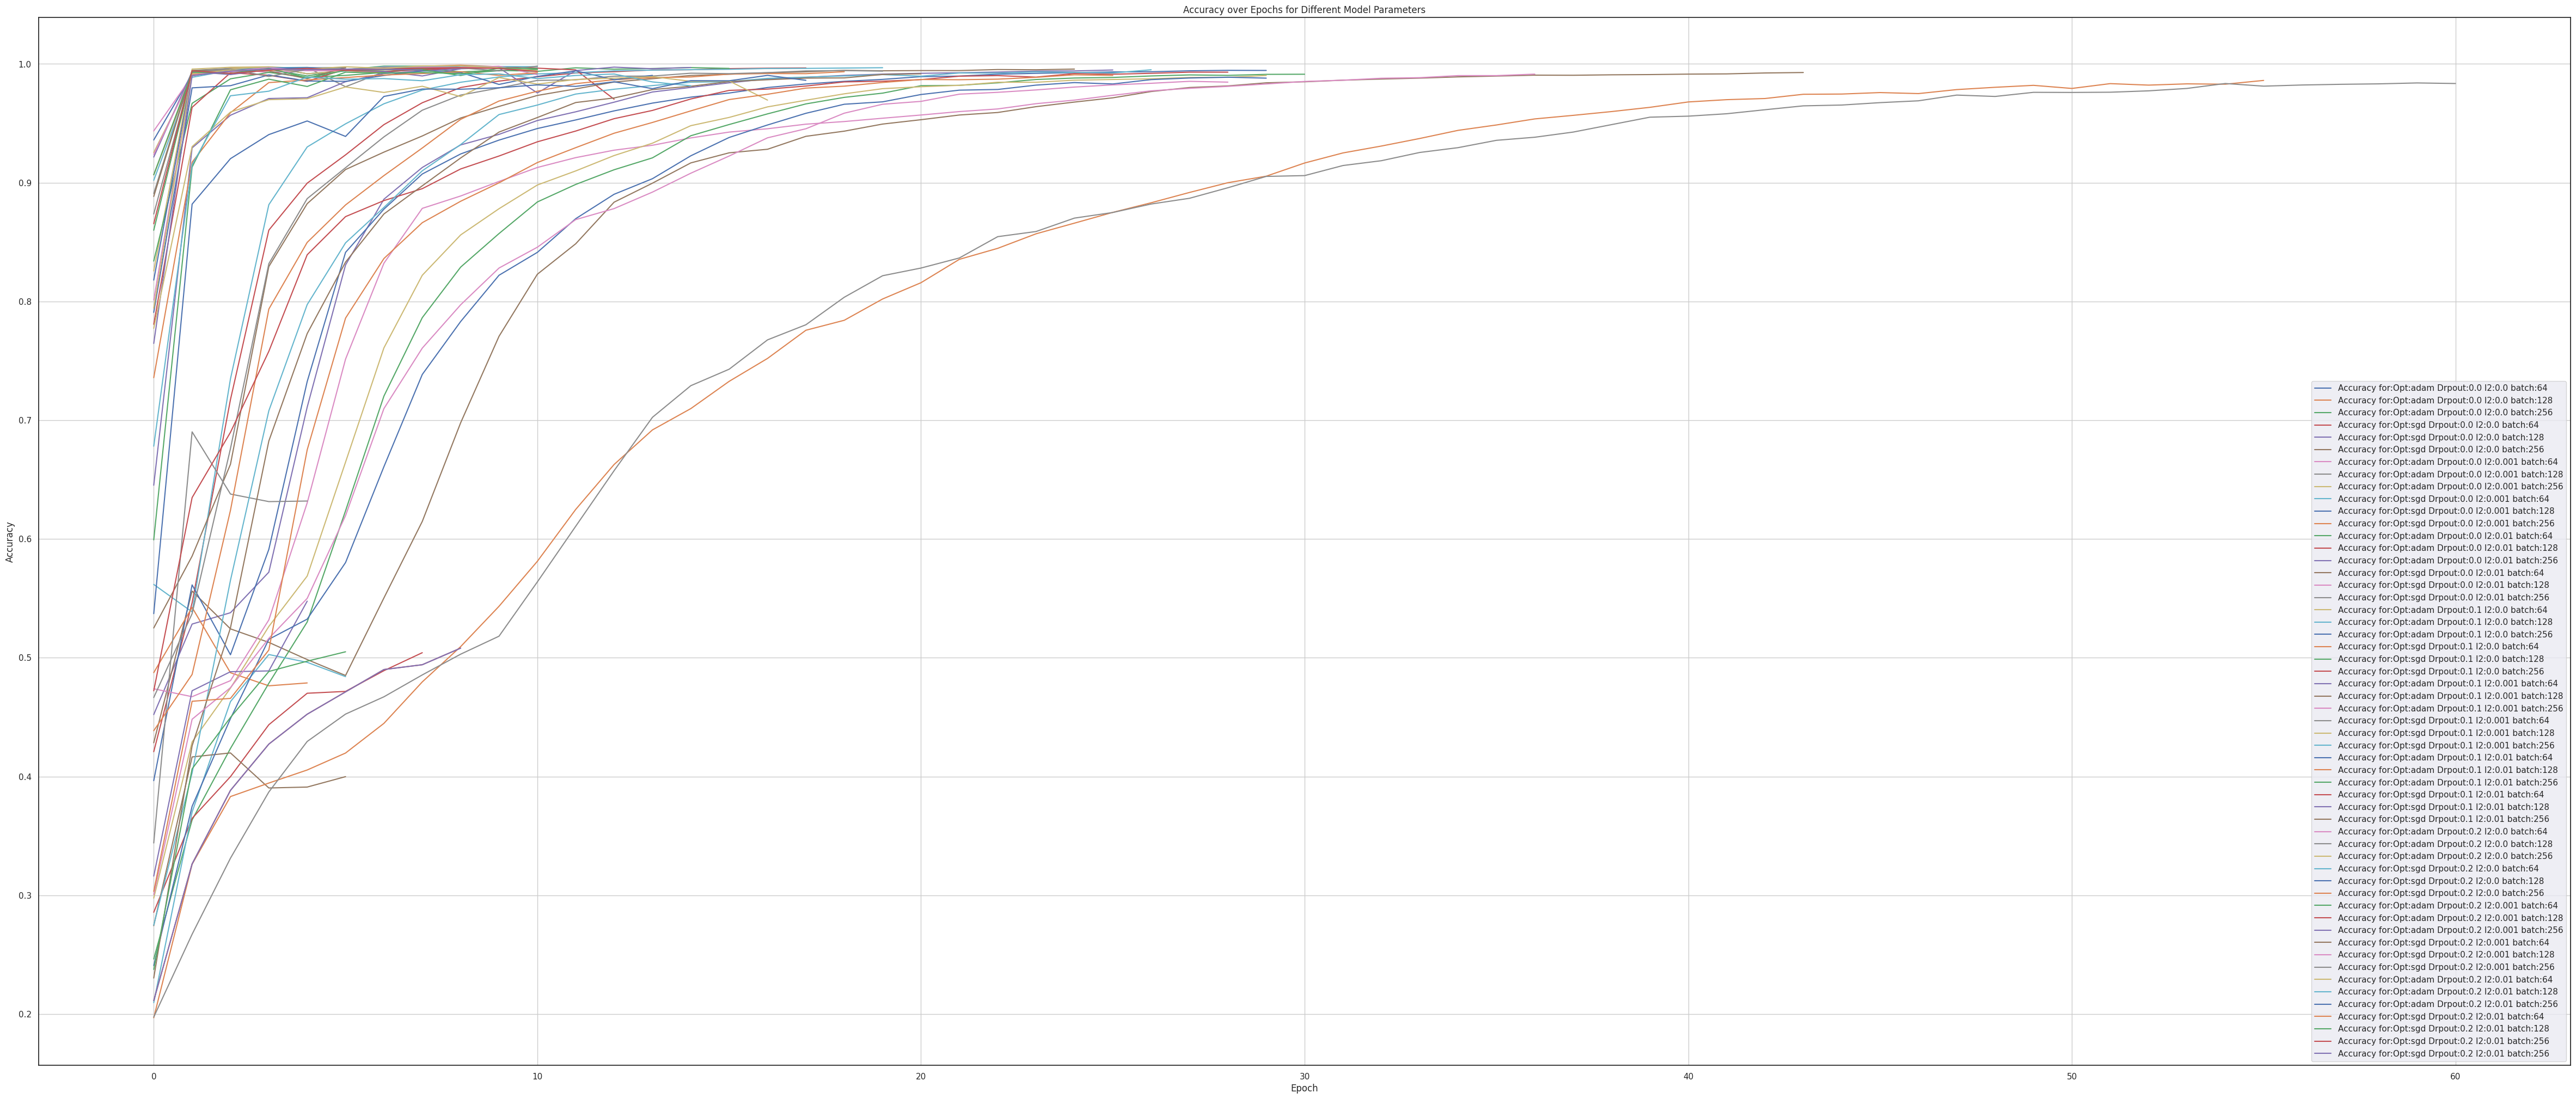

In [18]:
optimizers = ['adam', 'sgd']
dropout_rates = [0.0, 0.1, 0.2]
l2_regs = [0.0, 0.001, 0.01]
batch_sizes = [64, 128, 256]

Accuracy = []
Loss = []
Parameters = []

plt.figure(figsize = (60,25))

early_stop = EarlyStopping(monitor='val_accuracy', patience=4)


for dropout_rate in dropout_rates:
    for l2_reg in l2_regs:
        for optimizer in optimizers:
            for batch_size in batch_sizes:
              model = Sequential()

              # Input layer
              model.add(Dense(512, input_shape=X_train1.shape[1:], activation='relu'))

              # Hidden layers
              model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)))
              model.add(Dropout(dropout_rate))
              model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)))
              model.add(Dropout(dropout_rate))
              model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)))
              model.add(Dropout(dropout_rate))
              model.add(Dense(512, activation='relu', kernel_regularizer=l2(l2_reg)))
              model.add(Dropout(dropout_rate))
              
              # Output layer
              model.add(Dense(8, activation='softmax'))

              model.summary()

          
              # Compile the model
              model.compile(optimizer = optimizer, 
                                loss = 'categorical_crossentropy',
                                metrics = ['accuracy'])

              history = model.fit(X_train1, y_train_onehot, epochs=100, batch_size=batch_size, validation_split=0.1, callbacks = early_stop)

              score = model.evaluate(X_test1, y_test_onehot, verbose=0)

              Accuracy.append(score[1]*100)
              Loss.append(score[0])   
              Parameters.append(' Acc:{}, Loss:{} // Optimizer:{} / Dropout:{} / l2:{} / batch:{}'.format(score[1]*100, score[0], optimizer, dropout_rate, l2_reg, batch_size))  

              plt.plot(history.history['accuracy'], label='Accuracy for:Opt:{} Drpout:{} l2:{} batch:{}'.format( optimizer, dropout_rate, l2_reg, batch_size))



sns.set_style("darkgrid")
sns.lineplot(data=history.history["accuracy"], label="Accuracy for:Opt:{} Drpout:{} l2:{} batch:{}".format(optimizer, dropout_rate, l2_reg, batch_size))
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.title("Accuracy over Epochs for Different Model Parameters")

plt.grid(True)
plt.legend()
plt.show()

In [20]:
Parameters

[' Acc:99.19270873069763, Loss:0.028841061517596245 // Optimizer:adam / Dropout:0.0 / l2:0.0 / batch:64',
 ' Acc:99.79166388511658, Loss:0.005688287317752838 // Optimizer:adam / Dropout:0.0 / l2:0.0 / batch:128',
 ' Acc:99.609375, Loss:0.011153217405080795 // Optimizer:adam / Dropout:0.0 / l2:0.0 / batch:256',
 ' Acc:99.71354007720947, Loss:0.018191078677773476 // Optimizer:sgd / Dropout:0.0 / l2:0.0 / batch:64',
 ' Acc:99.47916865348816, Loss:0.03238488733768463 // Optimizer:sgd / Dropout:0.0 / l2:0.0 / batch:128',
 ' Acc:99.27083253860474, Loss:0.04344509169459343 // Optimizer:sgd / Dropout:0.0 / l2:0.0 / batch:256',
 ' Acc:99.63541626930237, Loss:0.1246044710278511 // Optimizer:adam / Dropout:0.0 / l2:0.001 / batch:64',
 ' Acc:99.58333373069763, Loss:0.17728491127490997 // Optimizer:adam / Dropout:0.0 / l2:0.001 / batch:128',
 ' Acc:99.79166388511658, Loss:0.30803921818733215 // Optimizer:adam / Dropout:0.0 / l2:0.001 / batch:256',
 ' Acc:99.6874988079071, Loss:1.854436993598938 // 

Accuracy : 99.84375238418579 %, Loss : 0.004998969845473766 // Optimizer: Adam / Dropout: 0.2 / l2: 0.0 / batch: 64

In [18]:
y_train_onehot2 = to_categorical(Y_train-1, num_classes)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 512)               3072      
                                                                 
 dense_4 (Dense)             (None, 512)               262656    
                                                                 
 dropout (Dropout)           (None, 512)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               262656    
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_6 (Dense)             (None, 512)               262656    
                                                                 
 dropout_2 (Dropout)         (None, 512)              

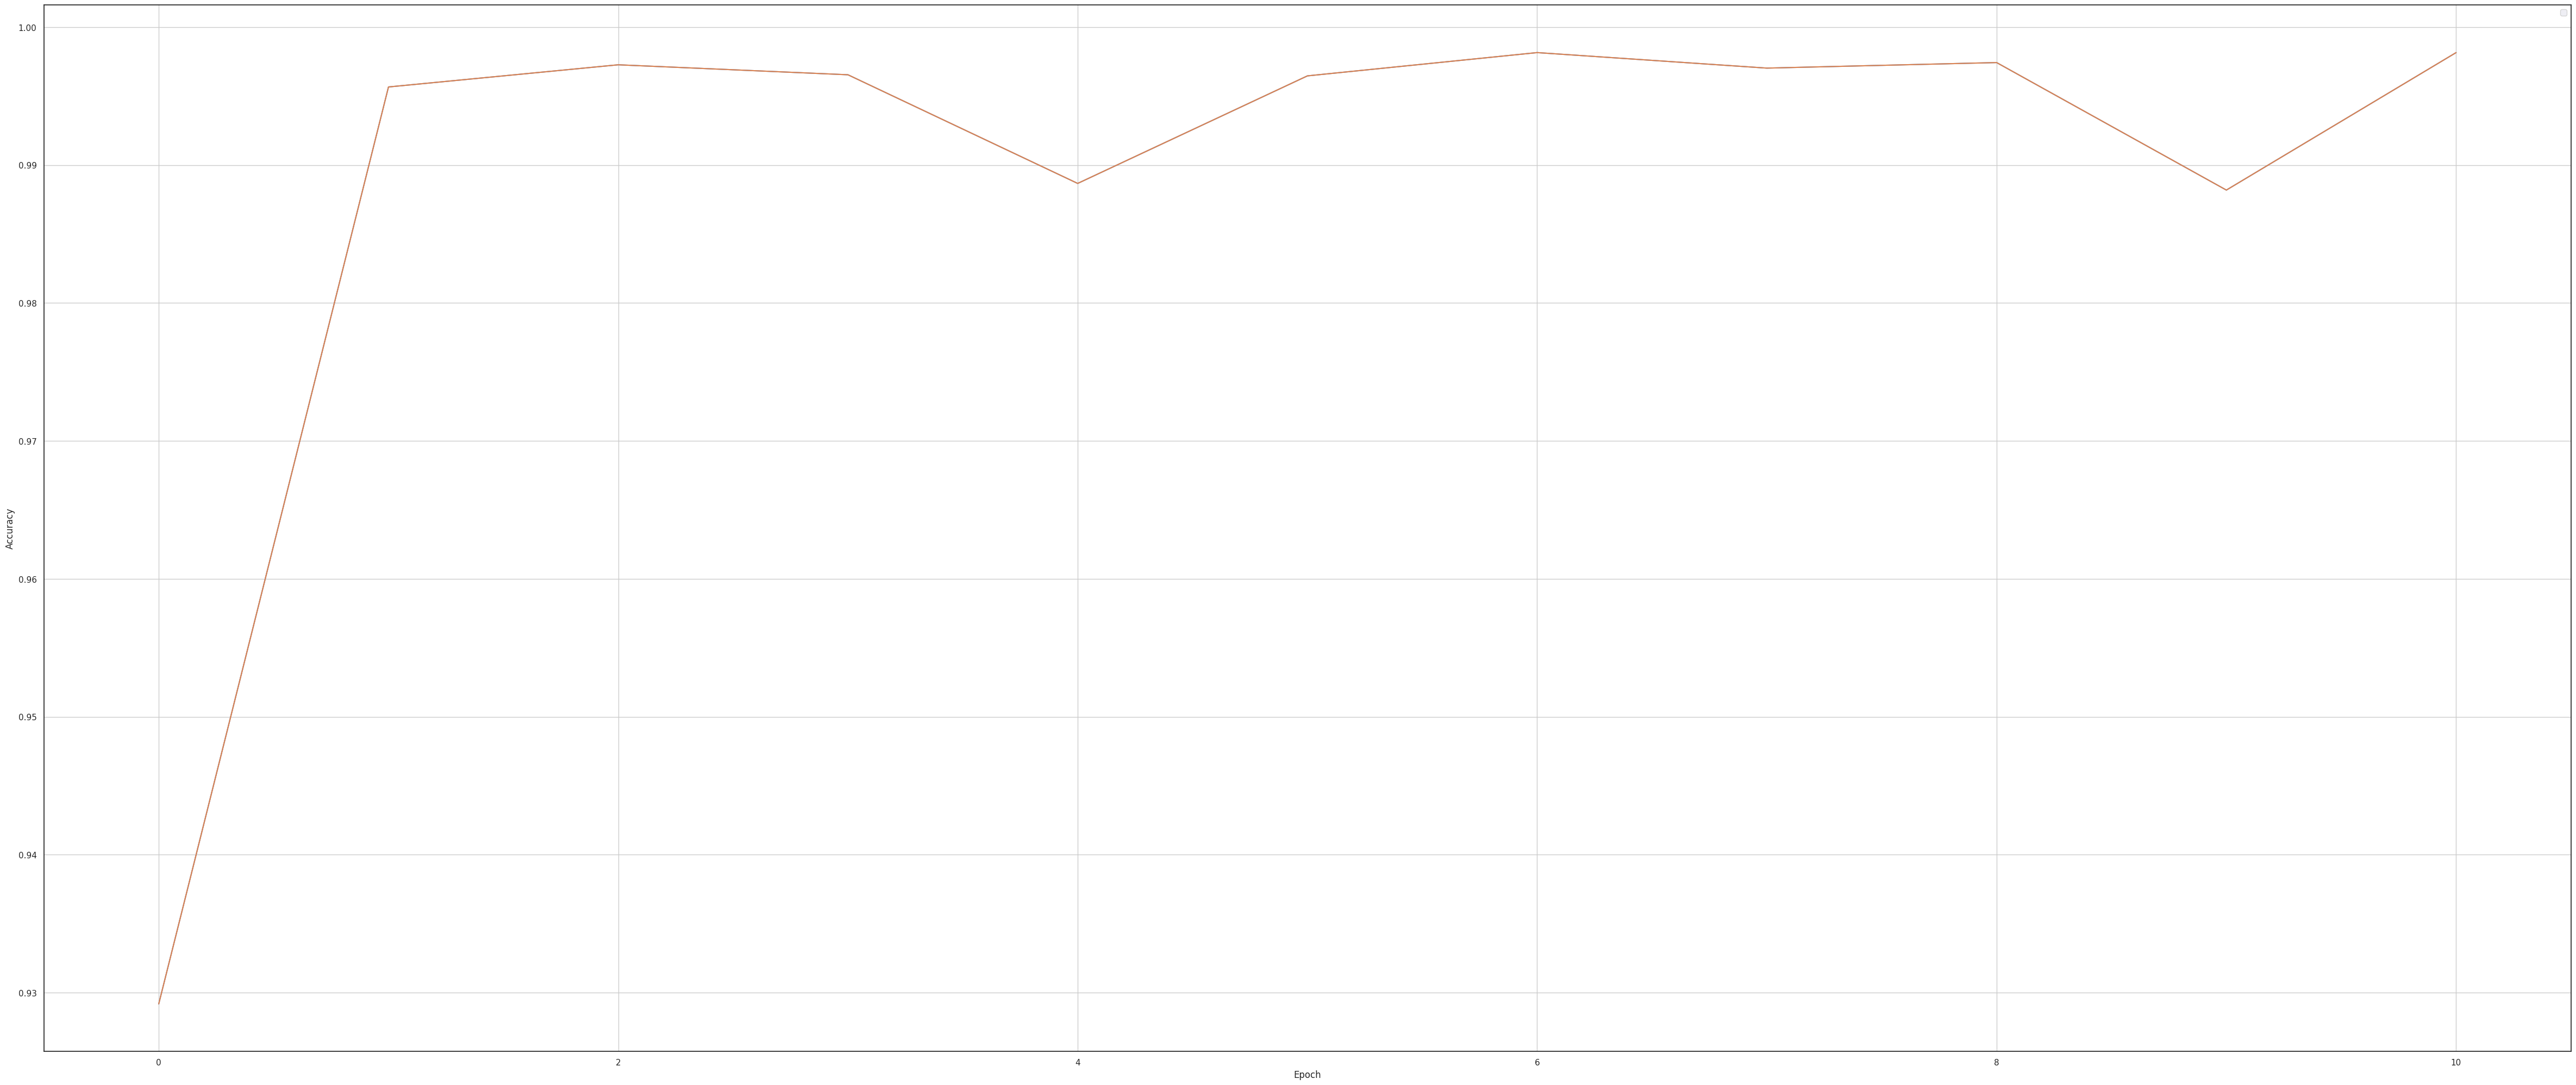

In [22]:
optimizer = 'adam'
dropout_rate = 0.0
l2 = 0.01
batch_size = 128

plt.figure(figsize = (60,25))

early_stop = EarlyStopping(monitor='val_accuracy', patience=4)


model = Sequential()

# Input layer
model.add(Dense(512, input_shape=X_train1.shape[1:], activation='relu'))

# Hidden layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout_rate))
model.add(Dense(512, activation='relu'))
model.add(Dropout(dropout_rate))
              
# Output layer
model.add(Dense(8, activation='softmax'))

model.summary()

          
# Compile the model
model.compile(optimizer = optimizer, 
                                loss = 'categorical_crossentropy',
                                metrics = ['accuracy'])

history = model.fit(X_train1, y_train_onehot, epochs=100, batch_size=batch_size, validation_split=0.1, callbacks = early_stop)

score = model.evaluate(X_test1, y_test_onehot, verbose=0)
  

plt.plot(history.history['accuracy'])



sns.set_style("darkgrid")
sns.lineplot(data=history.history["accuracy"])
plt.xlabel("Epoch")
plt.ylabel("Accuracy")


plt.grid(True)
plt.legend()
plt.show()

In [23]:
y_pred_onehot = model.predict(X_predict1)

120/120 [==============================] - 1s 4ms/step


In [24]:
y_pred = np.argmax(y_pred_onehot, axis=1) + 1

In [25]:
y_pred

array([5, 8, 5, ..., 2, 3, 1])

In [26]:
y_submit = pd.DataFrame(y_pred, columns=['target'])

In [27]:
y_submit

target
0          5
1          8
2          5
3          1
4          6
...      ...
3835       7
3836       1
3837       2
3838       3
3839       1

[3840 rows x 1 columns]

In [32]:
y_submit.to_csv('submission.csv')

## Support Vector Machine

In [34]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.multioutput import MultiOutputClassifier
from sklearn import svm
from sklearn.metrics import accuracy_score

lb = LabelBinarizer()
y_train_SVM = lb.fit_transform(y_train)
y_test_SVM = lb.fit_transform(y_test)



linear = svm.SVC(kernel='linear', C=1, decision_function_shape='ovo')
rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')
poly = svm.SVC(kernel='poly', degree=3, C=1, decision_function_shape='ovo')
sig = svm.SVC(kernel='sigmoid', C=1, decision_function_shape='ovo')


svm_kernel = ['linear','rbf','poly','sig']

for i, clf in enumerate((linear, rbf, poly, sig)):

  # Create an SVM classifier with the one-vs-rest strategy
  svm_clf = clf

  # Create a multi-output classifier with the SVM classifier
  multi_clf = MultiOutputClassifier(svm_clf, n_jobs=-1)

  # Train the multi-output classifier on the training data
  multi_clf.fit(X_train1, y_train_SVM)

  # Predict the classes of the testing data

  y_pred = multi_clf.predict(X_test1)

  y_pred_inv = lb.inverse_transform(y_pred)
  y_test_svm = y_test.to_numpy()

  # Calculate the accuracy of the classifier
  accuracy = accuracy_score(y_test, y_pred_inv)

  print("Accuracy for {} kernel: {}".format(svm_kernel[i] , accuracy))


Accuracy for linear kernel: 0.8170572916666666
Accuracy for rbf kernel: 0.9973958333333334
Accuracy for poly kernel: 0.9765625
Accuracy for sig kernel: 0.125


In [54]:
subm_svm = multi_clf.predict(X_predict1)

In [55]:
subm_svm = lb.inverse_transform(subm_svm)
subm_svm = pd.DataFrame(subm_svm, columns = ['target'])
subm_svm.to_csv('submission.csv')

In [56]:
subm_svm

target
0          5
1          8
2          5
3          1
4          6
...      ...
3835       7
3836       1
3837       2
3838       3
3839       1

[3840 rows x 1 columns]

## PCA transformation

In [49]:
from sklearn.decomposition import PCA

pca = PCA(n_components=3)

pca.fit(X_train1)

# Transform the training, testing and predictable data using the same PCA object

X_train_pca = pca.transform(X_train1)

X_test_pca = pca.transform(X_test1)

X_predict_pca = pca.transform(X_predict1)

# Print the explained variance ratio of the principal components
print("Explained variance ratio:", pca.explained_variance_ratio_)

Explained variance ratio: [0.82710597 0.11959212 0.02745124]


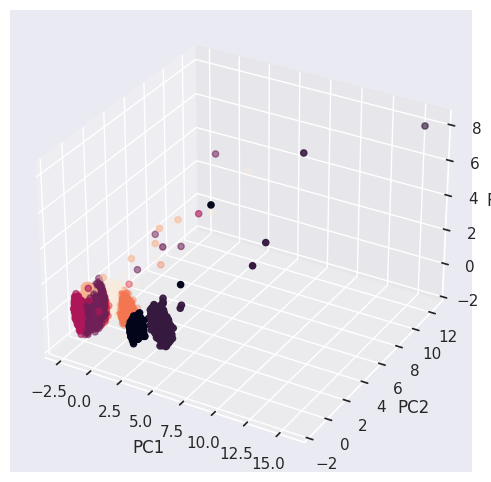

In [50]:
# Scatter plot the PCA transformed data in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_train_pca[:, 0], X_train_pca[:, 1], X_train_pca[:, 2], c=y_train)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

This was runned with case PCA n components = 2

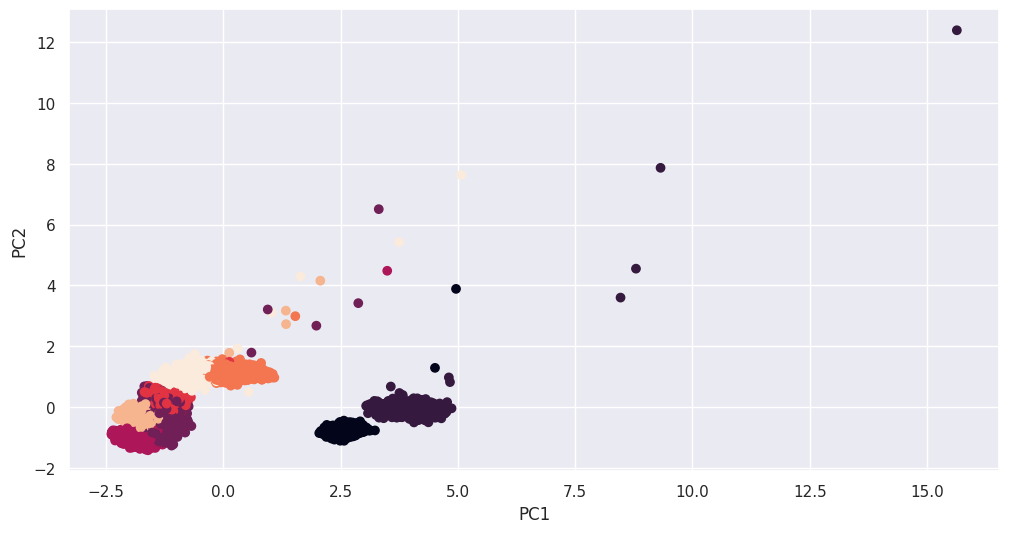

In [46]:

# Scatter plot the PCA transformed data with different colors for each class
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train.to_numpy())
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()


In [51]:
svm_clf = rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')

# Create a multi-output classifier with the SVM classifier
multi_clf = MultiOutputClassifier(svm_clf, n_jobs=-1)

# Train the multi-output classifier on the training data
multi_clf.fit(X_train_pca, y_train_SVM)

# Predict the classes of the testing data

y_pred = multi_clf.predict(X_test_pca)

y_pred_inv = lb.inverse_transform(y_pred)
y_test_svm = y_test.to_numpy()

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_inv)

In [52]:
accuracy

0.9837239583333334

In [54]:
subm_svm = multi_clf.predict(X_predict_pca)

subm_svm = lb.inverse_transform(subm_svm)
subm_svm = pd.DataFrame(subm_svm, columns = ['target'])
subm_svm.to_csv('submission.csv')

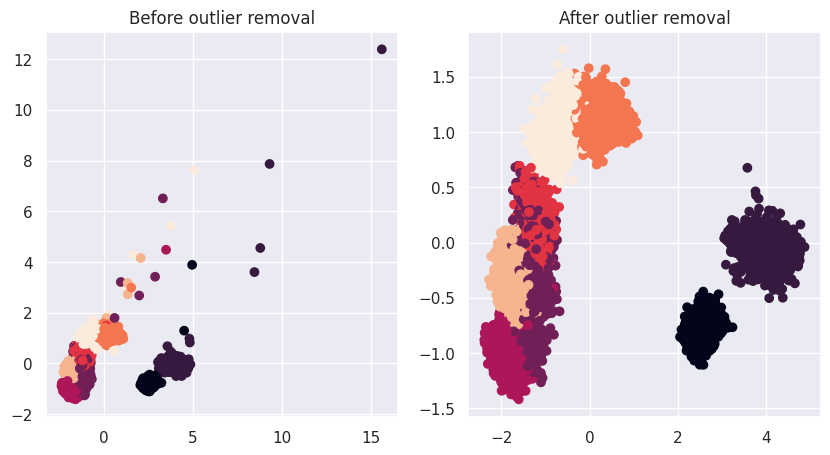

In [57]:
from sklearn.cluster import DBSCAN
y_train_pca = y_train.to_numpy()

# Create a DBSCAN object with eps=0.5 and min_samples=5
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Fit the PCA-transformed training data using the DBSCAN object
dbscan.fit(X_train_pca)

# Get the indices of the outliers
outlier_idx = np.where(dbscan.labels_ == -1)[0]

# Remove the outliers from the PCA-transformed training data
X_train_pca_clean = np.delete(X_train_pca, outlier_idx, axis=0)

# Plot the PCA-transformed training data before and after outlier removal
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train_pca)
axs[0].set_title("Before outlier removal")
axs[1].scatter(X_train_pca_clean[:, 0], X_train_pca_clean[:, 1], c=y_train_pca[np.delete(np.arange(len(y_train)), outlier_idx)])
axs[1].set_title("After outlier removal")
plt.show()

In [61]:
y_train_SVM_clean = lb.fit_transform(y_train_pca[np.delete(np.arange(len(y_train)), outlier_idx)])


svm_clf = rbf = svm.SVC(kernel='rbf', gamma=1, C=1, decision_function_shape='ovo')

# Create a multi-output classifier with the SVM classifier
multi_clf = MultiOutputClassifier(svm_clf, n_jobs=-1)

# Train the multi-output classifier on the training data
multi_clf.fit(X_train_pca_clean, y_train_SVM_clean)

# Predict the classes of the testing data

y_pred = multi_clf.predict(X_test_pca)

y_pred_inv = lb.inverse_transform(y_pred)
y_test_svm = y_test.to_numpy()

# Calculate the accuracy of the classifier
accuracy = accuracy_score(y_test, y_pred_inv)

In [62]:
accuracy

0.9837239583333334